In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar

pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/")

In [3]:
# Get the name of the columns
xls = pd.ExcelFile('E:/Trinity/Dissertation/Sem 3/Columns.xlsx')
col_names = list(pd.read_excel(xls).columns)

In [5]:
# data = pd.read_csv("2019-04-09.csv", names = col_names)   # Test reading a single file
# print(len(data))       #148180
# data.isnull().sum()    

In [2]:
#Group Plaza IDs based on Toll
def addTollName(plazaid):
    if plazaid in (1416,1417):
        return "Limerick Tunnel"
    elif plazaid in (1415,2885,2886):    # 0 added as dummy ---- TO-DO
        return "M1"
    elif plazaid in (2862,2861):
        return "M3"
    elif plazaid in (2863,2864,2865,2866):
        return "M4"
    elif plazaid in (1420,1421):
        return "M50"
    elif plazaid in (1419,0):
        return "M7-M8"
    elif plazaid in (1423,0):
        return "Dublin Tunnel"
    elif plazaid in (1424,0):
        return "Eastlink"
    elif plazaid in (1422,0):
        return "N25"
    elif plazaid in (1418,0):
        return "N6"
    elif plazaid in (2869,2870):
        return "M8"
    else:
        return "--"
    

In [7]:
files = glob.glob("*.csv")[0:100]      #Let's do in batches, next [100:200], [200:300] . . . 

In [ ]:
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

for num,file in enumerate(files):
    data = pd.read_csv(file, names=col_names, na_values=['NULL'])
    data["tollname"] = data["entryplazaid"].apply(addTollName)
    tolls = data["tollname"].unique()
    date = file[:-4]

    for toll in tolls:
        print(f'\rReading file - {num+1}/100   -  Scanning tollway - {toll}                    ', end='')
        count_list = []
        start = pd.to_datetime(file[:-4], format='%Y-%m-%d')
        day = calendar.day_name[start.weekday()] + "/"
        filepath = day + toll + "/"

        df = data[data["tollname"]==toll]
        for i in range (0, 24):
            end   = start + pd.offsets.DateOffset(hours=1)
            count = pd.to_datetime(df["entrytransdt"], format='%Y-%m-%d %H:%M:%S').between(start, end).sum()
            count_list.append(count)
            
            # Write data into new CSV
            # date, tollname, starttime, endtime, no_of_cars
            with open("../hourly_details.csv", 'a') as hd:
                hd.write(file[:-4] + "," + toll + "," + str(start) + "," + str(end) + "," + str(count))
                hd.write("\n")
            
            start = end
            
        plt.bar(time, count_list)
        plt.xlabel('Time of day (in 00 hours)')
        plt.ylabel('Number of cars')
        plt.savefig('../images/' + filepath + file[:-3])
        plt.clf()


In [ ]:
files = glob.glob("*.csv")[377:]      #Let's do in batches

time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

for num,file in enumerate(files):
    data = pd.read_csv(file, names=col_names, na_values=['NULL'])
    data["tollname"] = data["entryplazaid"].apply(addTollName)
    tolls = data["tollname"].unique()
    date = file[:-4]

    for toll in tolls:
        print(f'\rReading file - {num+1}/100   -  Scanning tollway - {toll}                    ', end='')
        count_list = []
        start = pd.to_datetime(file[:-4], format='%Y-%m-%d')
        day = calendar.day_name[start.weekday()] + "/"
        filepath = day + toll + "/"

        df = data[data["tollname"]==toll]
        for i in range (0, 24):
            end   = start + pd.offsets.DateOffset(hours=1)
            count = pd.to_datetime(df["entrytransdt"], format='%Y-%m-%d %H:%M:%S').between(start, end).sum()
            count_list.append(count)
            
            # Write data into new CSV
            # date, tollname, starttime, endtime, no_of_cars
            with open("../hourly_details.csv", 'a') as hd:
                hd.write(file[:-4] + "," + toll + "," + str(start) + "," + str(end) + "," + str(count))
                hd.write("\n")
            
            start = end
            
        plt.bar(time, count_list)
        plt.xlabel('Time of day (in 00 hours)')
        plt.ylabel('Number of cars')
        plt.savefig('../images/' + filepath + file[:-3])
        plt.clf()


Read the new DataFrame

In [ ]:
os.chdir("E:/Trinity/Dissertation/Sem 3/models/")
df = pd.read_csv("hourly_details.csv")  

In [ ]:
df

In [ ]:
summary(df)

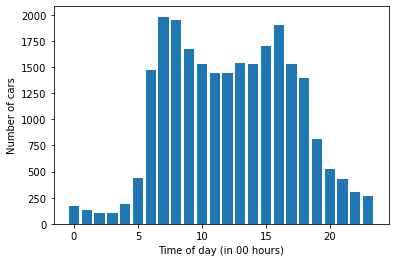

In [15]:
file = '2019-01-10.csv'
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

data = pd.read_csv(file, names=col_names, na_values=['NULL'])

count_list = []
start = pd.to_datetime(file[:-4], format='%Y-%m-%d')
#day = calendar.day_name[start.weekday()] + "/"
#filepath = day + toll + "/"

df = data[data["entryplazaid"]==1420]
for i in range (0, 24):
    end   = start + pd.offsets.DateOffset(hours=1)
    count = pd.to_datetime(df["entrytransdt"], format='%Y-%m-%d %H:%M:%S').between(start, end).sum()
    count_list.append(count)

    start = end

plt.bar(time, count_list)
plt.xlabel('Time of day (in 00 hours)')
plt.ylabel('Number of cars')
plt.show()

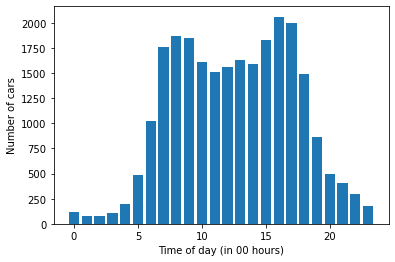

In [16]:
file = '2019-01-10.csv'
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

data = pd.read_csv(file, names=col_names, na_values=['NULL'])

count_list = []
start = pd.to_datetime(file[:-4], format='%Y-%m-%d')
#day = calendar.day_name[start.weekday()] + "/"
#filepath = day + toll + "/"

df = data[data["entryplazaid"]==1421]
for i in range (0, 24):
    end   = start + pd.offsets.DateOffset(hours=1)
    count = pd.to_datetime(df["entrytransdt"], format='%Y-%m-%d %H:%M:%S').between(start, end).sum()
    count_list.append(count)

    start = end

plt.bar(time, count_list)
plt.xlabel('Time of day (in 00 hours)')
plt.ylabel('Number of cars')
plt.show()